# 1. Introduction & Motivation

## Problem Description

During our experience as interns, we realized the demand & need for predicting future revenue.
So many organizations look for this analysis as it plays a critical role in business/management
decisions such as product pricing, customer targeting, promotions, etc. These types of decisions
are usually based on various features such as historical sales as well as unit price, customer
demographics, seasonal trends, etc. Something to highlight is many of these organizations don’t
have the knowledge or resources to accomplish this mission. Using this inspiration, our project
aims to fill this void by utilizing regression techniques on given historical sales data from
potential retail companies, as well as market analysis data, to help in predicting revenue(sales
forecasting) critical for solving problems related to business strategy and management
decisions

## Research Questions

1. What are the main factors that influence revenue in a supermarket or retail environment?
2. What features play the biggest role in yearly revenue outcomes?
3. How accurate is regression analysis in predicting future revenue?
4. How do external factors(market trends) affect revenue outcomes?

# 2. Data Collection

- After doing more research we have decided to use the Walmart Dataset from
Kaggle to assist us in our regression analysis(sales forecasting)
- This dataset was posted and updated by the user, M Yasser H, on Kaggle
- This historical sales data was originally collected from Walmart between the
years 2010 to 2012
- This dataset is pretty structured so there aren't any notable modifications made
along the way except for the filling of null values which could've been done by the
Kaggle user.

# 3. Description of Data

After doing some basic data analysis and understanding some of the information given
in the description section of Kaggle here is what we learned about the data:

- There are 8 columns and 6436 rows
- Columns include:
  
Store: Int(Numerical),

Date: Object
Weekly_Sales: Float(Numerical),

Holiday_Flag: Int(Numerical),

Temperature: Float(Numerical),

Fuel_Price: Float(Numerical)

CPI: Float(Numerical)

Unemployment: Float(Numerical)

## Data Loading

In [3]:
import pandas as pd
import datetime

df = pd.read_csv("Walmart.csv")
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
print("Basic Statistics:")
print(df.describe())  

Basic Statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23280

# 4. Data Cleaning and Wrangling Project

In [6]:
df.info

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

       

In [7]:
df.shape

(6435, 8)

In [8]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

## Data Cleaning 

The first step in our project is ensuring we clean our data. For the most part, this dataset is pretty organized, however, there are a few key factors that must be taken into account for this regression model to work down the road. This includes:

1. Changing date format for date row
2. Rounding values that seem redundant
3. Renaming columns and adding necessary symbols($, %, etc.) so we understand the data better for contextual purposes

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
df['Temperature'] = df['Temperature'].round(0)
df['Unemployment'] = df['Unemployment'].round(1)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.0,2.572,211.096358,8.1
1,1,2010-02-12,1641957.44,1,39.0,2.548,211.242170,8.1
2,1,2010-02-19,1611968.17,0,40.0,2.514,211.289143,8.1
3,1,2010-02-26,1409727.59,0,47.0,2.561,211.319643,8.1
4,1,2010-03-05,1554806.68,0,46.0,2.625,211.350143,8.1


In [11]:
#Renaming Holiday Flag to Holiday Week 
df["Holiday_Week"] = df["Holiday_Flag"]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Week
0,1,2010-02-05,1643690.90,0,42.0,2.572,211.096358,8.1,0
1,1,2010-02-12,1641957.44,1,39.0,2.548,211.242170,8.1,1
2,1,2010-02-19,1611968.17,0,40.0,2.514,211.289143,8.1,0
3,1,2010-02-26,1409727.59,0,47.0,2.561,211.319643,8.1,0
4,1,2010-03-05,1554806.68,0,46.0,2.625,211.350143,8.1,0
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,65.0,3.997,192.013558,8.7,0
6431,45,2012-10-05,733455.07,0,65.0,3.985,192.170412,8.7,0
6432,45,2012-10-12,734464.36,0,54.0,4.000,192.327265,8.7,0
6433,45,2012-10-19,718125.53,0,56.0,3.969,192.330854,8.7,0


In [12]:
#dropping Holiday Flag column
df.drop("Holiday_Flag", axis=1, inplace=True)

In [13]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Holiday_Week             int64
dtype: object

##  Exploratory Data Analysis

In [14]:
# summary statistics for Temperature, Fuel_price,
#  CPI, Unemployment, and Weekly Sales
weekly_sales = df["Weekly_Sales"]
weekly_sales.describe()


count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [15]:
temperature = df["Temperature"]
temperature.describe()

count    6435.000000
mean       60.670552
std        18.444818
min        -2.000000
25%        47.000000
50%        63.000000
75%        75.000000
max       100.000000
Name: Temperature, dtype: float64

In [16]:
fuel_price = df["Fuel_Price"]
fuel_price.describe()

count    6435.000000
mean        3.358607
std         0.459020
min         2.472000
25%         2.933000
50%         3.445000
75%         3.735000
max         4.468000
Name: Fuel_Price, dtype: float64

In [17]:
cpi = df["CPI"]
cpi.describe()

count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75%       212.743293
max       227.232807
Name: CPI, dtype: float64

In [18]:
unemployment = df["Unemployment"]
unemployment.describe()

count    6435.000000
mean        8.000746
std         1.875256
min         3.900000
25%         6.900000
50%         7.900000
75%         8.600000
max        14.300000
Name: Unemployment, dtype: float64

## Missing Values

In [19]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Holiday_Week    0
dtype: int64

No missing values identified. As a result, no handling of missing values is needed.

## Data Modification for Consistency
1. Checked for Negative values (Incorrect values) in several columns

In [20]:
#Checking for negatives values
#  in weekly sales, Holiday Week, CPI, and Unemployment

for data in df["Weekly_Sales"]:
    if data < 0:
        print(data)

for data in df["Holiday_Week"]:
    if data < 0:
        print(data)

for data in df["CPI"]:
    if data < 0:
        print(data)

for data in df["Unemployment"]:
    if data < 0:
        print(data)

## Feature Engineering
Extracted Month

In [21]:
#Extracting Month as Jan,Feb,March
df["Month"] = df["Date"].dt.strftime("%B")
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Week,Month
0,1,2010-02-05,1643690.90,42.0,2.572,211.096358,8.1,0,February
1,1,2010-02-12,1641957.44,39.0,2.548,211.242170,8.1,1,February
2,1,2010-02-19,1611968.17,40.0,2.514,211.289143,8.1,0,February
3,1,2010-02-26,1409727.59,47.0,2.561,211.319643,8.1,0,February
4,1,2010-03-05,1554806.68,46.0,2.625,211.350143,8.1,0,March
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,65.0,3.997,192.013558,8.7,0,September
6431,45,2012-10-05,733455.07,65.0,3.985,192.170412,8.7,0,October
6432,45,2012-10-12,734464.36,54.0,4.000,192.327265,8.7,0,October
6433,45,2012-10-19,718125.53,56.0,3.969,192.330854,8.7,0,October


# 5. Data Analysis

We first want to understand our data through visualizations. This is important in deciding which regression algorithm is most useful in predicting sales revenue. If we see more of a linear relationship between sales and the various input features we might opt for linear regression. If not, we might make use of another algorithm like random forest regression.

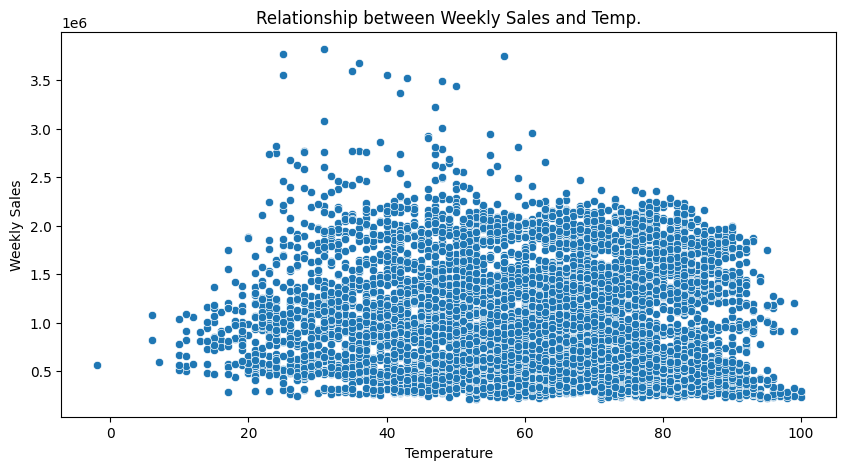

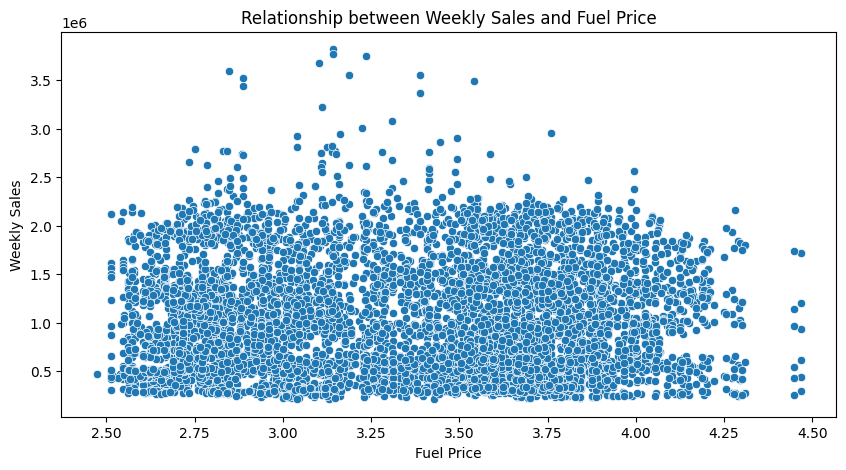

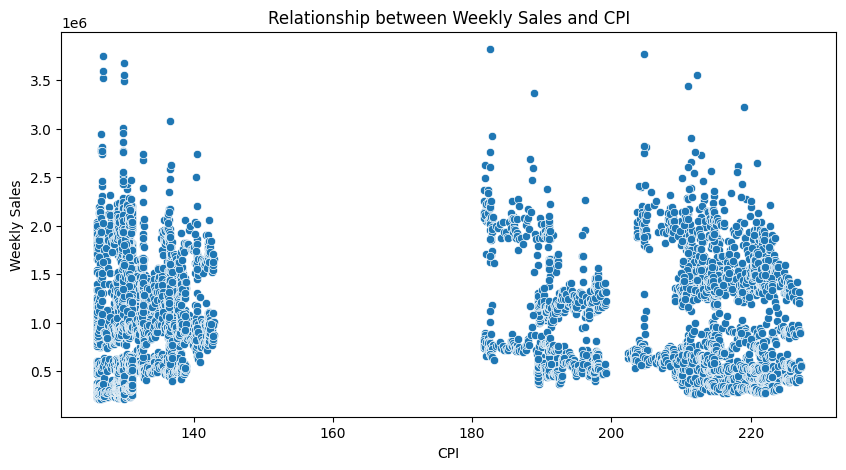

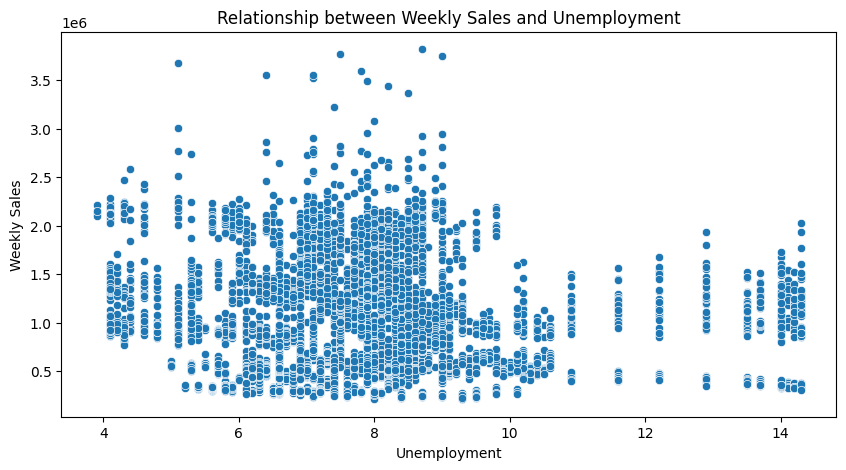

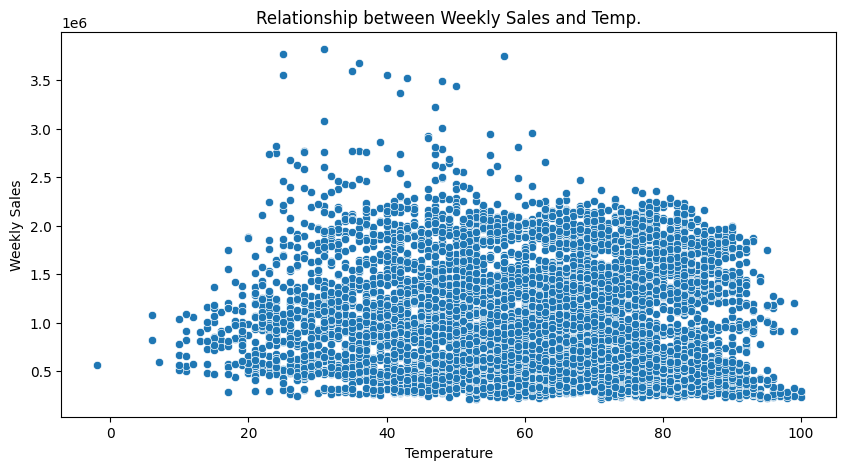

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data =df)
plt.title("Relationship between Weekly Sales and Temp.")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data =df)
plt.title("Relationship between Weekly Sales and Fuel Price")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x="CPI", y="Weekly_Sales", data =df)
plt.title("Relationship between Weekly Sales and CPI")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data =df)
plt.title("Relationship between Weekly Sales and Unemployment")
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data =df)
plt.title("Relationship between Weekly Sales and Temp.")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

In this case we see most of these relationships are non-linear and are highly concentrated in a given range. As a result, we will make use of the random forest regression algorithm which is good for more non-linear relationships.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# As we learned during our time-series unit, we will use rolling mean since we have so much data and noise(spikes). The rolling mean will help smoothen/center our weekly sales data 

df["Rolling_Mean"] = df["Weekly_Sales"].rolling(window=4).mean()
df.dropna(inplace=True) 

X = df[["Temperature", "Fuel_Price", "CPI", "Holiday_Week", "Unemployment", "Rolling_Mean"]]
Y = df["Weekly_Sales"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [24]:
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train, Y_train)

y_pred = rfr.predict(X_test)

We will not evaluate our model using an appropriate evaluation metric for RandomForest Regression. In this case we will use R^2. We want this value to be as close to 1 as possible to be effeicent.

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(f"r^2 score is {r2}")

r^2 score is 0.9423689224501428


Extract insights into which variables have highest impact on predictors

In [27]:
rfr.feature_importances_

array([0.01206605, 0.00935736, 0.00935869, 0.00506043, 0.0058697 ,
       0.95828777])

Feature Importance Analysis
- Temperature: 1.20%
- Fuel Price: .93%
- CPI: .93%
- Holiday Week: .50%
- Unemployment: .58%
- Rolling Mean: 95.82%


Rolling Mean is by far the most important feature accounting for around 95.82% of the models importance. Other features like Temperature, Fuel Price, CPI, Holiday Week, and Unemployment collectively only account for 4.14% to the predictions. The highlites the importance of historical sales data in predicting weekly sales. 

What are the main factors that influence revenue in a supermarket or retail environment?
- Based on the data and feature importance analysis the factors that most influence revenue is Rolling Mean of Weekly Sales: Historical Sales trends dominate the prediction model accounting for more than 95% of the model's importance

What features play the biggest role in yearly revenue outcomes?
- Rolling Mean is the most importance feature, and business should focus on analyzing historical sales trends for forecasting revenue

How accurate is regression analysis in predicting future revenue?
- R^2 score of .94 indicates that the Random Forest Regression model explains 94% of the variance in weekly sales, showing that this model is highly accurate in predicting revenue when historical sales are included

How do external factors(market trends) affect revenue outcomes?
- Other Factors:
    - Temperature: May impact customer demand (weather specific items e.g. snowboarding equipment)
    - Fuel Price: While it's impact is minor it can indirectly influence consumer behavior through transportantion costs
    - CPI and Unemployment: Althought these have low feature importance scores they still may indirectly affecting consumer behavior. And over longer periods or under economic conditions may influence sales
    - Holiday Week: Despite it's low feature importance, holiday week still represents events that may cause spikes in revenue in the short term e.g. seasonal shopping. 
    
Althought external factors have a small impact on weekly sales, these factors interact with other variables like seasons and should not be ignored in business strategies. Albeit, the most importance feature in predicting weekly sales is historical sales data which highlites a growing need for businesses to analyaize historical sales trends to be able to better forecast revenue.

## Exporting Final Dataset (in CSV format)

In [26]:
df.to_csv('final_dataset.csv', index=False)